# Imports and Reads

[Attribute File](data\Attributes_2015-16.csv)  
[Dataset File](\data\Data_2015-16.csv)

Steps:  
Access Data 2015-16.csv  
Columns numbers are the attribute_id.  
Pick attribute id: 315   or.   542  
Identify attributes that are correlated/dependent/related/influencing to the picked attribute. (you can pick up any approach) Use Data2015-16.csv for the same.  
Say you got : 315--- related to ( 23,67,89,54,2234)  
Join the above results with Attribute_2015-16.csv  
Store results as output.csv  

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

attr = pd.read_csv('D:\\Kartik\\IIITB\\Study\\Sem 3\\Placement Prep\\ML Projects\\PE ADT SWL\\data\\Attributes_2015-16.csv', delimiter=';')
df = pd.read_csv('D:\\Kartik\\IIITB\\Study\\Sem 3\\Placement Prep\\ML Projects\\PE ADT SWL\\data\\Data_2015-16.csv', delimiter=';')

pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

#constants

BASE_ATTR_315 = '315'
BASE_ATTR_542 = '542'
DF_ID = '1'

# reviewing dataset

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 1169 entries, 1 to 1183
dtypes: float64(430), int64(738), object(1)
memory usage: 274.1+ KB


In [322]:
dtypedf = pd.DataFrame(df.dtypes)
float64df = dtypedf[dtypedf[0]=='float64']
int64df = dtypedf[dtypedf[0]=='int64']
float64df['index'] = float64df.index.to_list()
int64df['index'] = int64df.index.to_list()
int64df

C:\Users\karti\AppData\Local\Temp\ipykernel_11536\3897389600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  float64df['index'] = float64df.index.to_list()
C:\Users\karti\AppData\Local\Temp\ipykernel_11536\3897389600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int64df['index'] = int64df.index.to_list()


,0,index
1,int64,1
3,int64,3
4,int64,4
5,int64,5
6,int64,6
...,...,...
1179,int64,1179
1180,int64,1180
1181,int64,1181
1182,int64,1182


let's convert all dtypes to float64 for consistency between data

In [323]:
# attr = pd.read_csv('D:\\Kartik\\IIITB\\Study\\Sem 3\\Placement Prep\\ML Projects\\PE ADT SWL\\data\\Attributes_2015-16.csv', delimiter=';'
df = pd.read_csv('D:\\Kartik\\IIITB\\Study\\Sem 3\\Placement Prep\\ML Projects\\PE ADT SWL\\data\\Data_2015-16.csv', delimiter=';'\
                   , dtype={col: 'float64' for col in int64df['index']})

In [324]:
dtypedf = pd.DataFrame(df.dtypes)
int64df = dtypedf[dtypedf[0]=='int64']
int64df['index'] = int64df.index.to_list()
int64df

,0,index


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 1169 entries, 1 to 1183
dtypes: float64(1168), object(1)
memory usage: 274.1+ KB


In [326]:
df

,1,2,3,4,5,6,7,8,9,10,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
0,1.0,Bengaluru,27.0,198.0,27.0,96.0,4.0,16.0,562.0,26.0,...,0.0,73454.0,65846.0,14679.0,90.0,80615.0,65336.0,13465.0,544.0,79345.0
1,2.0,Bengaluru (R),17.0,183.0,17.0,105.0,4.0,7.0,957.0,94.0,...,0.0,133665.0,145020.0,33789.0,58.0,178867.0,125693.0,26260.0,81.0,152034.0
2,3.0,Ramanagara,18.0,244.0,18.0,126.0,4.0,6.0,820.0,52.0,...,0.0,183810.0,221460.0,49825.0,163.0,271448.0,167899.0,34406.0,261.0,202566.0
3,4.0,Chitradurga,22.0,312.0,22.0,189.0,6.0,8.0,948.0,115.0,...,0.0,402224.0,227197.0,63232.0,148.0,290577.0,438437.0,117797.0,4543.0,560777.0
4,5.0,Davangere,24.0,272.0,24.0,233.0,6.0,8.0,800.0,123.0,...,0.0,323462.0,226426.0,54817.0,1434.0,282677.0,333819.0,75816.0,4051.0,413686.0
5,6.0,Kolar,27.0,262.0,27.0,156.0,5.0,7.0,1608.0,189.0,...,0.0,189103.0,198213.0,38257.0,385.0,236855.0,200194.0,33277.0,452.0,233923.0
6,7.0,Chikkaballapura,26.0,249.0,26.0,157.0,6.0,8.0,1324.0,189.0,...,0.0,170903.0,178301.0,36054.0,107.0,214462.0,190840.0,33354.0,2163.0,226357.0
7,8.0,Shivamogga,37.0,377.0,37.0,271.0,7.0,9.0,1444.0,86.0,...,0.0,234739.0,169524.0,44187.0,297.0,214008.0,209674.0,51327.0,1297.0,262298.0
8,9.0,Tumakuru,50.0,568.0,50.0,331.0,10.0,12.0,2582.0,133.0,...,0.0,569246.0,326779.0,87403.0,246.0,414428.0,554996.0,120064.0,1328.0,676388.0
9,10.0,Chikkamagaluru,34.0,237.0,34.0,227.0,7.0,9.0,1022.0,95.0,...,0.0,273004.0,182860.0,39251.0,1366.0,223477.0,248508.0,51259.0,13609.0,313376.0


now all dtypes are float64

In [327]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
0,1.0,Bengaluru,27.0,198.0,27.0,96.0,4.0,16.0,562.0,26.0,...,0.0,73454.0,65846.0,14679.0,90.0,80615.0,65336.0,13465.0,544.0,79345.0
1,2.0,Bengaluru (R),17.0,183.0,17.0,105.0,4.0,7.0,957.0,94.0,...,0.0,133665.0,145020.0,33789.0,58.0,178867.0,125693.0,26260.0,81.0,152034.0
2,3.0,Ramanagara,18.0,244.0,18.0,126.0,4.0,6.0,820.0,52.0,...,0.0,183810.0,221460.0,49825.0,163.0,271448.0,167899.0,34406.0,261.0,202566.0
3,4.0,Chitradurga,22.0,312.0,22.0,189.0,6.0,8.0,948.0,115.0,...,0.0,402224.0,227197.0,63232.0,148.0,290577.0,438437.0,117797.0,4543.0,560777.0
4,5.0,Davangere,24.0,272.0,24.0,233.0,6.0,8.0,800.0,123.0,...,0.0,323462.0,226426.0,54817.0,1434.0,282677.0,333819.0,75816.0,4051.0,413686.0


In [328]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '1174', '1175', '1176', '1177', '1178', '1179', '1180', '1181', '1182',
       '1183'],
      dtype='object', length=1169)

In [329]:
# pd.set_option('display.max_columns')
# pd.set_option('display.max_rows',25)
df

,1,2,3,4,5,6,7,8,9,10,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
0,1.0,Bengaluru,27.0,198.0,27.0,96.0,4.0,16.0,562.0,26.0,...,0.0,73454.0,65846.0,14679.0,90.0,80615.0,65336.0,13465.0,544.0,79345.0
1,2.0,Bengaluru (R),17.0,183.0,17.0,105.0,4.0,7.0,957.0,94.0,...,0.0,133665.0,145020.0,33789.0,58.0,178867.0,125693.0,26260.0,81.0,152034.0
2,3.0,Ramanagara,18.0,244.0,18.0,126.0,4.0,6.0,820.0,52.0,...,0.0,183810.0,221460.0,49825.0,163.0,271448.0,167899.0,34406.0,261.0,202566.0
3,4.0,Chitradurga,22.0,312.0,22.0,189.0,6.0,8.0,948.0,115.0,...,0.0,402224.0,227197.0,63232.0,148.0,290577.0,438437.0,117797.0,4543.0,560777.0
4,5.0,Davangere,24.0,272.0,24.0,233.0,6.0,8.0,800.0,123.0,...,0.0,323462.0,226426.0,54817.0,1434.0,282677.0,333819.0,75816.0,4051.0,413686.0
5,6.0,Kolar,27.0,262.0,27.0,156.0,5.0,7.0,1608.0,189.0,...,0.0,189103.0,198213.0,38257.0,385.0,236855.0,200194.0,33277.0,452.0,233923.0
6,7.0,Chikkaballapura,26.0,249.0,26.0,157.0,6.0,8.0,1324.0,189.0,...,0.0,170903.0,178301.0,36054.0,107.0,214462.0,190840.0,33354.0,2163.0,226357.0
7,8.0,Shivamogga,37.0,377.0,37.0,271.0,7.0,9.0,1444.0,86.0,...,0.0,234739.0,169524.0,44187.0,297.0,214008.0,209674.0,51327.0,1297.0,262298.0
8,9.0,Tumakuru,50.0,568.0,50.0,331.0,10.0,12.0,2582.0,133.0,...,0.0,569246.0,326779.0,87403.0,246.0,414428.0,554996.0,120064.0,1328.0,676388.0
9,10.0,Chikkamagaluru,34.0,237.0,34.0,227.0,7.0,9.0,1022.0,95.0,...,0.0,273004.0,182860.0,39251.0,1366.0,223477.0,248508.0,51259.0,13609.0,313376.0


In [330]:
dfnotna = pd.DataFrame(df.notna().sum())
completeNaDf = dfnotna[dfnotna[0]==0] #completely null attributes
completeNaDf.shape

(14, 1)

In [331]:
completeNaDf

,0
419,0
507,0
508,0
509,0
590,0
600,0
676,0
691,0
692,0
693,0


there are 14 completely null columns let's remove them

In [332]:
df['419']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
Name: 419, dtype: float64

In [333]:
df = df.drop(completeNaDf.index.to_list(), axis=1)
df.shape

(30, 1155)

In [334]:
# df['419']

now there are only semi null attributes but no completely null attributes

In [335]:
nadf = pd.DataFrame(df.isna().sum())
nadf = nadf[nadf[0]>0]
nadf['index'] = nadf.index.to_list()
nadf_save=nadf
nadf

,0,index
10,2,10
12,20,12
13,2,13
14,1,14
15,6,15
...,...,...
929,1,929
939,2,939
941,26,941
942,21,942


In [336]:
nadf.shape

(327, 2)

we have 327 na present attributes. since its all numeric data. let's replace by mean.

In [337]:
df.describe()

,1,3,4,5,6,7,8,9,10,11,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,28.000000,30.000000,...,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,25.633333,285.800000,25.633333,200.633333,5.866667,11.566667,913.233333,69.392857,978.000000,...,0.0,343638.266667,211102.800000,49549.300000,420.866667,261072.966667,336340.233333,63277.466667,2430.866667,402048.566667
std,8.803408,10.223311,109.660102,10.223311,81.977913,2.046584,7.933705,571.791177,56.548464,614.694934,...,0.0,210942.131610,89507.381766,24881.744584,515.071855,104618.868770,218242.860293,33861.683741,2908.921897,244156.324400
min,1.000000,9.000000,109.000000,9.000000,96.000000,3.000000,5.000000,233.000000,5.000000,233.000000,...,0.0,73454.000000,57651.000000,10803.000000,11.000000,68881.000000,65336.000000,13465.000000,81.000000,79345.000000
25%,8.250000,17.250000,209.250000,17.250000,146.250000,4.250000,7.000000,532.000000,23.250000,561.000000,...,0.0,174129.750000,154623.000000,34737.000000,93.500000,209871.750000,180286.000000,34986.000000,786.500000,217946.500000
50%,15.500000,25.000000,256.500000,25.000000,193.500000,5.500000,9.000000,807.500000,49.500000,878.000000,...,0.0,324161.500000,195720.000000,42803.000000,258.000000,227094.500000,299976.000000,61853.000000,1537.000000,366015.000000
75%,22.750000,33.750000,325.500000,33.750000,232.500000,7.000000,12.750000,1232.000000,110.500000,1285.500000,...,0.0,406577.000000,263341.750000,63063.250000,492.500000,321669.000000,409315.250000,76305.000000,3122.500000,478280.750000
max,30.000000,50.000000,568.000000,50.000000,502.000000,11.000000,41.000000,2582.000000,189.000000,2715.000000,...,0.0,915122.000000,487883.000000,112940.000000,2344.000000,530935.000000,919337.000000,157393.000000,13609.000000,992289.000000


In [338]:
for index in nadf['index']:
    df[index] = df[index].fillna(df[index].mean())

In [339]:
nadf = pd.DataFrame(df.isna().sum())
nadf = nadf[nadf[0]>0]
nadf['index'] = nadf.index.to_list()
nadf

,0,index


now there are no null values at all in dataset

In [340]:
df

,1,2,3,4,5,6,7,8,9,10,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
0,1.0,Bengaluru,27.0,198.0,27.0,96.0,4.0,16.0,562.0,26.000000,...,0.0,73454.0,65846.0,14679.0,90.0,80615.0,65336.0,13465.0,544.0,79345.0
1,2.0,Bengaluru (R),17.0,183.0,17.0,105.0,4.0,7.0,957.0,94.000000,...,0.0,133665.0,145020.0,33789.0,58.0,178867.0,125693.0,26260.0,81.0,152034.0
2,3.0,Ramanagara,18.0,244.0,18.0,126.0,4.0,6.0,820.0,52.000000,...,0.0,183810.0,221460.0,49825.0,163.0,271448.0,167899.0,34406.0,261.0,202566.0
3,4.0,Chitradurga,22.0,312.0,22.0,189.0,6.0,8.0,948.0,115.000000,...,0.0,402224.0,227197.0,63232.0,148.0,290577.0,438437.0,117797.0,4543.0,560777.0
4,5.0,Davangere,24.0,272.0,24.0,233.0,6.0,8.0,800.0,123.000000,...,0.0,323462.0,226426.0,54817.0,1434.0,282677.0,333819.0,75816.0,4051.0,413686.0
5,6.0,Kolar,27.0,262.0,27.0,156.0,5.0,7.0,1608.0,189.000000,...,0.0,189103.0,198213.0,38257.0,385.0,236855.0,200194.0,33277.0,452.0,233923.0
6,7.0,Chikkaballapura,26.0,249.0,26.0,157.0,6.0,8.0,1324.0,189.000000,...,0.0,170903.0,178301.0,36054.0,107.0,214462.0,190840.0,33354.0,2163.0,226357.0
7,8.0,Shivamogga,37.0,377.0,37.0,271.0,7.0,9.0,1444.0,86.000000,...,0.0,234739.0,169524.0,44187.0,297.0,214008.0,209674.0,51327.0,1297.0,262298.0
8,9.0,Tumakuru,50.0,568.0,50.0,331.0,10.0,12.0,2582.0,133.000000,...,0.0,569246.0,326779.0,87403.0,246.0,414428.0,554996.0,120064.0,1328.0,676388.0
9,10.0,Chikkamagaluru,34.0,237.0,34.0,227.0,7.0,9.0,1022.0,95.000000,...,0.0,273004.0,182860.0,39251.0,1366.0,223477.0,248508.0,51259.0,13609.0,313376.0


In [341]:
df.shape

(30, 1155)

now there are 1155 attributes remaining including one object attribute

In [342]:
numericAttr = [ attr for attr in df.columns if attr!='2']

In [343]:
df_num = df[numericAttr]

In [344]:
df[numericAttr].corr()

,1,3,4,5,6,7,8,9,10,11,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
1,1.000000,-0.031226,-0.055436,-0.031226,0.083019,0.072729,-0.046162,-0.298104,-0.542614,-0.321925,...,NaN,0.422923,0.171396,-0.056077,-0.152277,0.132552,0.444796,0.323749,-0.155760,0.440632
3,-0.031226,1.000000,0.775379,1.000000,0.627085,0.735927,0.078325,0.793698,0.413808,0.784653,...,NaN,0.296818,0.585241,0.536886,0.289664,0.629821,0.274452,0.349637,0.112613,0.295155
4,-0.055436,0.775379,1.000000,0.775379,0.860198,0.746601,0.354629,0.708748,0.328380,0.691823,...,NaN,0.504548,0.810805,0.629888,0.158656,0.844278,0.465804,0.457764,-0.051848,0.479235
5,-0.031226,1.000000,0.775379,1.000000,0.627085,0.735927,0.078325,0.793698,0.413808,0.784653,...,NaN,0.296818,0.585241,0.536886,0.289664,0.629821,0.274452,0.349637,0.112613,0.295155
6,0.083019,0.627085,0.860198,0.627085,1.000000,0.801677,0.511643,0.532115,0.098359,0.504336,...,NaN,0.643170,0.812483,0.424450,0.136938,0.796747,0.598305,0.422103,0.104988,0.594595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,0.132552,0.629821,0.844278,0.629821,0.796747,0.592889,0.223547,0.594378,0.276379,0.581614,...,NaN,0.724303,0.978490,0.682012,0.130355,1.000000,0.689580,0.645056,-0.055029,0.705198
1180,0.444796,0.274452,0.465804,0.274452,0.598305,0.356064,0.045748,0.136118,-0.257042,0.112143,...,NaN,0.987257,0.773616,0.121351,-0.234210,0.689580,1.000000,0.739824,-0.081009,0.995505
1181,0.323749,0.349637,0.457764,0.349637,0.422103,0.274567,0.015522,0.202541,0.035859,0.192463,...,NaN,0.744467,0.604316,0.538957,-0.030759,0.645056,0.739824,1.000000,-0.023102,0.799716
1182,-0.155760,0.112613,-0.051848,0.112613,0.104988,0.079193,-0.049705,-0.010706,0.059235,-0.003732,...,NaN,-0.052963,-0.066459,-0.002506,0.492859,-0.055029,-0.081009,-0.023102,1.000000,-0.063701


there are na values for this cause corr is not defined for a sample with variance zero since we use variance in denominator for find the correlation

In [345]:
dfR2 = df[numericAttr].corr().pow(2) #R2 for the attributes.

In [346]:
dfR2_90 = dfR2.applymap(lambda x: 0 if x<0.9 else x)
dfR2_90[dfR2_90['315']>0]['315']

C:\Users\karti\AppData\Local\Temp\ipykernel_11536\52991407.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfR2_90 = dfR2.applymap(lambda x: 0 if x<0.9 else x)


312    0.978341
313    0.936766
315    1.000000
Name: 315, dtype: float64

so attributes 312 and 313 are explaining there 90% variance from the relationship with 315

In [347]:
dfR2_60 =  dfR2.applymap(lambda x: 0 if x<0.6 else x)
dfR2_60[dfR2_60['315']>0]['315']

C:\Users\karti\AppData\Local\Temp\ipykernel_11536\3315195109.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfR2_60 =  dfR2.applymap(lambda x: 0 if x<0.6 else x)


188    0.646743
197    0.650578
230    0.639404
312    0.978341
313    0.936766
314    0.647304
315    1.000000
Name: 315, dtype: float64

there r other attributes namely 188, 197, 230 and 314 which are also correlating with 315 but only a little about 60% of their variance is being explained.

In [348]:
df542 = dfR2_90[dfR2_90['542']>0]['542']
df542.index.to_list()

['20',
 '22',
 '26',
 '28',
 '34',
 '40',
 '45',
 '46',
 '49',
 '52',
 '53',
 '54',
 '55',
 '59',
 '60',
 '61',
 '62',
 '64',
 '66',
 '78',
 '93',
 '123',
 '124',
 '125',
 '126',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '409',
 '415',
 '416',
 '452',
 '461',
 '493',
 '496',
 '497',
 '510',
 '513',
 '518',
 '537',
 '538',
 '539',
 '540',
 '541',
 '542',
 '559',
 '561',
 '562',
 '563',
 '564',
 '567',
 '568',
 '570',
 '572',
 '573',
 '601',
 '602',
 '608',
 '609',
 '610',
 '611',
 '636',
 '637',
 '638',
 '639',
 '645',
 '646',
 '647',
 '665',
 '666',
 '683',
 '711',
 '712',
 '713',
 '895',
 '902',
 '908',
 '944',
 '945',
 '946',
 '949',
 '950',
 '956',
 '958',
 '959',
 '973']

Above are the correlated attributes with attribute 542 (with 90% R2 value)

In [349]:
#setup plt

def plotColumns(columns: list[str], x):
    for column in columns:
        plt.scatter(df[x], df[column], label=column, marker=".", lw=0.5)
        # plt.hist(df[column],label=column)
        # plt.bar(df[DF_ID], df[column], label=column)
    plt.legend(loc='upper right')

def columns(start:int, to:int):
    list = []
    for i in range(start, to):
        list.append(str(i))
    return list

let's try normalizing dataset and them again do correlation analysis

In [350]:
df_norm = (df_num-df_num.mean())/df_num.std()

In [351]:
df_num.describe()

,1,3,4,5,6,7,8,9,10,11,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,25.633333,285.800000,25.633333,200.633333,5.866667,11.566667,913.233333,69.392857,978.000000,...,0.0,343638.266667,211102.800000,49549.300000,420.866667,261072.966667,336340.233333,63277.466667,2430.866667,402048.566667
std,8.803408,10.223311,109.660102,10.223311,81.977913,2.046584,7.933705,571.791177,54.563686,614.694934,...,0.0,210942.131610,89507.381766,24881.744584,515.071855,104618.868770,218242.860293,33861.683741,2908.921897,244156.324400
min,1.000000,9.000000,109.000000,9.000000,96.000000,3.000000,5.000000,233.000000,5.000000,233.000000,...,0.0,73454.000000,57651.000000,10803.000000,11.000000,68881.000000,65336.000000,13465.000000,81.000000,79345.000000
25%,8.250000,17.250000,209.250000,17.250000,146.250000,4.250000,7.000000,532.000000,25.250000,561.000000,...,0.0,174129.750000,154623.000000,34737.000000,93.500000,209871.750000,180286.000000,34986.000000,786.500000,217946.500000
50%,15.500000,25.000000,256.500000,25.000000,193.500000,5.500000,9.000000,807.500000,60.500000,878.000000,...,0.0,324161.500000,195720.000000,42803.000000,258.000000,227094.500000,299976.000000,61853.000000,1537.000000,366015.000000
75%,22.750000,33.750000,325.500000,33.750000,232.500000,7.000000,12.750000,1232.000000,105.500000,1285.500000,...,0.0,406577.000000,263341.750000,63063.250000,492.500000,321669.000000,409315.250000,76305.000000,3122.500000,478280.750000
max,30.000000,50.000000,568.000000,50.000000,502.000000,11.000000,41.000000,2582.000000,189.000000,2715.000000,...,0.0,915122.000000,487883.000000,112940.000000,2344.000000,530935.000000,919337.000000,157393.000000,13609.000000,992289.000000


In [352]:
df_norm.std().describe()

count    1.109000e+03
mean     9.963931e-01
std      5.997572e-02
min      3.387608e-16
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

In [353]:
df_norm.mean().describe()

count    1.109000e+03
mean     1.837221e-17
std      5.907429e-02
min     -9.831921e-01
25%     -5.181041e-17
50%      0.000000e+00
75%      5.551115e-17
max      9.831921e-01
dtype: float64

In [354]:
df_norm.min().describe()

count    1109.000000
mean       -1.118587
std         0.532966
min        -5.140684
25%        -1.376019
50%        -1.039168
75%        -0.757208
max         0.983192
dtype: float64

In [355]:
df_norm_rounded = df_norm.round(decimals=5)

In [356]:
df_norm_rounded.describe()

,1,3,4,5,6,7,8,9,10,11,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,...,0.0,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,30.000000,30.000000,3.000000e+01,3.000000e+01,3.000000e+01
mean,-1.480297e-17,-3.333333e-07,1.000000e-06,-3.333333e-07,1.850372e-17,3.333333e-07,1.000000e-06,-6.666667e-07,-3.333333e-07,3.333333e-07,...,NaN,-6.666667e-07,-6.666667e-07,1.665335e-17,6.666667e-07,-0.000001,-0.000002,-6.666667e-07,-6.666667e-07,-3.333333e-07
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999995e-01,1.000001e+00,1.000000e+00,1.000000e+00,9.999996e-01,9.999994e-01,...,NaN,1.000000e+00,9.999997e-01,9.999991e-01,9.999994e-01,1.000000,1.000000,1.000001e+00,1.000000e+00,9.999996e-01
min,-1.647090e+00,-1.627000e+00,-1.612250e+00,-1.627000e+00,-1.276360e+00,-1.400710e+00,-8.276900e-01,-1.189650e+00,-1.180140e+00,-1.211980e+00,...,NaN,-1.280850e+00,-1.714400e+00,-1.557220e+00,-7.957500e-01,-1.837070,-1.241760,-1.471060e+00,-8.078100e-01,-1.321710e+00
25%,-8.235425e-01,-8.200250e-01,-6.980675e-01,-8.200250e-01,-6.633925e-01,-7.899350e-01,-5.756000e-01,-6.667325e-01,-8.090175e-01,-6.783875e-01,...,NaN,-8.035825e-01,-6.310075e-01,-5.953075e-01,-6.355750e-01,-0.489405,-0.715050,-8.355025e-01,-5.652825e-01,-7.540375e-01
50%,0.000000e+00,-6.195000e-02,-2.671850e-01,-6.195000e-02,-8.701500e-02,-1.791600e-01,-3.235100e-01,-1.849150e-01,-1.629800e-01,-1.626800e-01,...,NaN,-9.233500e-02,-1.718600e-01,-2.711350e-01,-3.162000e-01,-0.324785,-0.166625,-4.207000e-02,-3.072850e-01,-1.475800e-01
75%,8.235425e-01,7.939375e-01,3.620250e-01,7.939375e-01,3.887200e-01,5.537700e-01,1.491500e-01,5.574900e-01,6.617450e-01,5.002475e-01,...,NaN,2.983700e-01,5.836250e-01,5.431275e-01,1.390775e-01,0.579205,0.334375,3.847275e-01,2.377650e-01,3.122250e-01
max,1.647090e+00,2.383440e+00,2.573410e+00,2.383440e+00,3.676190e+00,2.508240e+00,3.709910e+00,2.918490e+00,2.192060e+00,2.825790e+00,...,NaN,2.709200e+00,3.092260e+00,2.547680e+00,3.733720e+00,2.579480,2.671320,2.779410e+00,3.842710e+00,2.417470e+00


In [357]:
df_norm_roundedR2 = df_norm_rounded[numericAttr].corr().pow(2) #R2 for the attributes.

In [358]:
df_norm_roundedR2_60 =  df_norm_roundedR2.applymap(lambda x: 0 if x<0.6 else x)
df315 = df_norm_roundedR2_60[df_norm_roundedR2_60['315']>0]['315']
df315

C:\Users\karti\AppData\Local\Temp\ipykernel_11536\3958663742.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_norm_roundedR2_60 =  df_norm_roundedR2.applymap(lambda x: 0 if x<0.6 else x)


188    0.646744
197    0.650578
230    0.639404
312    0.978342
313    0.936766
314    0.647303
315    1.000000
Name: 315, dtype: float64

conclusion: even with the normalization we come with the same result. which is to be expected since the distribution didnt change. but for plotting this normalized values will be handy

# Tried to consider all as int64

In [359]:
# dfint64 = pd.read_csv('D:\\Kartik\\IIITB\\Study\\Sem 3\\Placement Prep\\ML Projects\\PE ADT SWL\\data\\Data_2015-16.csv', delimiter=';'\
#                    , dtype={col: 'int64' for col in float64df['index']})

In [360]:
# dfint64.info()

In [361]:
# dfint64 = dfint64.drop(completeNaDf.index.to_list(), axis=1)
# dfint64.shape

In [362]:
# for index in nadf_save['index']:
#     dfint64[index] = dfint64[index].fillna(dfint64[index].mean())

In [363]:
# nadf = pd.DataFrame(dfint64.isna().sum())
# nadf = nadf[nadf[0]>0]
# nadf['index'] = nadf_save.index.to_list()
# nadf

In [364]:
# df64_num = dfint64[numericAttr]

In [365]:
# df64_num.describe()

conclusion: since we will lose information if we treat all dtypes as int64 its not wise to do that.

# visualisation

In [379]:
df315df = pd.DataFrame(df315).reset_index()  #[-2:-1]
df315_90 = df315df[(df315df['315']>0.9) & (df315df['315']<1)]

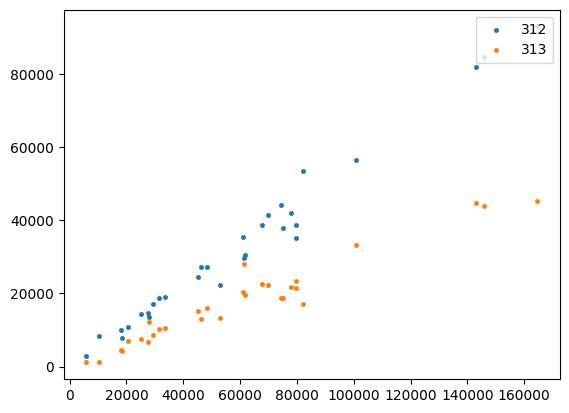

In [380]:
plotColumns(df315_90['index'],BASE_ATTR_315)

clearly both the correlated attriutes are looking dependent on 315

In [399]:
df542.shape

(95,)

In [400]:
df315df.shape

(7, 2)

In [395]:
df542df = pd.DataFrame(df542).reset_index()  #[-2:-1]
print('total number of correlated attributes of 542:', df542df.shape[0])
df542_90 = df542df[(df542df['542']>0.98) & (df542df['542']<1)]
df542_90

total number of correlated attributes of 542: 95


,index,542
14,60,0.981569
21,123,0.993374
22,124,0.991363
23,125,0.992899
27,130,0.981463
28,131,0.982883
29,132,0.983954
30,133,0.984703
31,134,0.985152
32,135,0.985325


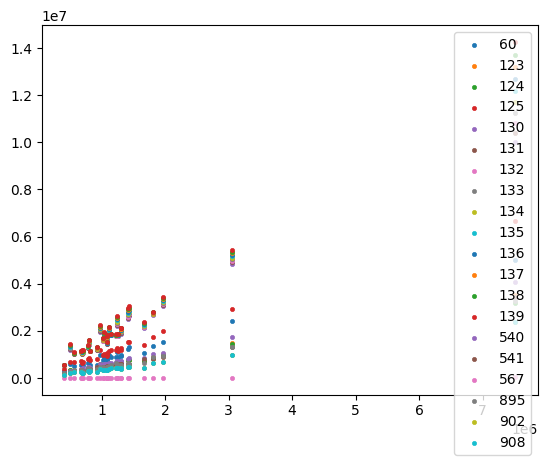

In [393]:
plotColumns(df542_90['index'],BASE_ATTR_542)